In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np

In [ ]:
#read the data
cars=pd.read_csv('/content/Cars.csv')
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [ ]:
#check for missing values
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

# **Correlation matrix**

In [ ]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


# Scatter plot between variables along with histograms


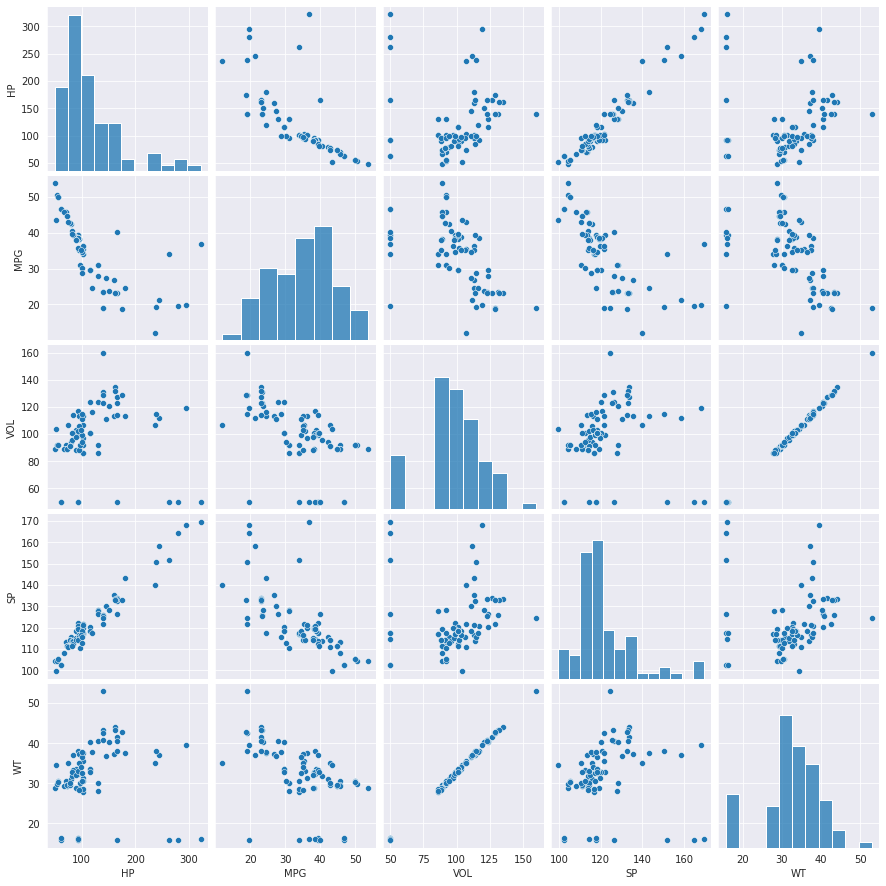

In [ ]:
#format the plot background and scatter plot and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(cars)# IN SEABORN SCATTER PLOT IS CALLED PAIRPLOT

# **Prearing a model**

In [ ]:
#build model
model=smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()#excess

In [ ]:
#coefficient beta values
model.params

Intercept    30.677336
WT            0.400574
VOL          -0.336051
SP            0.395627
HP           -0.205444
dtype: float64

In [ ]:
# t value and p values : print (model.tvalues,model.pvalues)
print("***t-values***",'\n',model.tvalues,'\n',"***p-values***",'\n',model.pvalues)
#p values of sp and hp only are significant .VOL and WT not significant meant .s both have same
#here p value of (wt n vol >0.o5 aplha so discard that )

***t-values*** 
 Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64 
 ***p-values*** 
 Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64


In [ ]:
#r squared values
(model.rsquared,model.rsquared_adj)

(0.7705372737359842, 0.7584602881431413)

# **Simple linear regression  models**

In [ ]:
ml_v=smf.ols('MPG~VOL',data=cars).fit() #simple linear regression model for MPG VS VOL
print(ml_v.tvalues,'\n',ml_v.pvalues)
# p val= 3.822819e-07 almost =0 and<0.05 so var is significant

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [ ]:
ml_w=smf.ols('MPG~WT',data=cars).fit() #simple linear regression model for MPG VS VOL
print(ml_w.tvalues,'\n',ml_w.pvalues)
# p val= 4.383467e-07 almost =0 and<0.05 so var is significant

Intercept    14.248923
WT           -5.508067
dtype: float64 
 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


In [ ]:
ml_wv=smf.ols('MPG~WT+VOL',data=cars).fit() #simple linear regression model for MPG VS VOL
print(ml_wv.tvalues,'\n',ml_wv.pvalues)
# p val>0.05 so var is insignificant

Intercept    12.545736
WT            0.489876
VOL          -0.709604
dtype: float64 
 Intercept    2.141975e-20
WT           6.255966e-01
VOL          4.800657e-01
dtype: float64


# **Calcualting VIP **

In [ ]:
rsq_hp=smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared
vip_hp = 1/(1-rsq_hp)

rsq_wt=smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared
vip_wt = 1/(1-rsq_wt)

rsq_vol=smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared
vip_vol = 1/(1-rsq_vol)

rsq_sp=smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared
vip_sp = 1/(1-rsq_sp)

#storing vif values in a adata frame
d1={'Variables':['HP','WT','VOL','SP'],'VIF':[vip_hp,vip_wt,vip_vol,vip_sp]}
Vif_frame=pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,HP,19.926589
1,WT,639.533818
2,VOL,19.926589
3,SP,19.926589


# **Subset Selection**

# **AIC**

In [ ]:
#build model with wt
model=smf.ols('MPG~WT+SP+HP',data=cars).fit()
print(model.aic,rsq_wt)
#feature which gives u high r^2  value and less AIC value sd b kept .
# so here compared to both models with wt and VOL
# we are discarding wt module.

476.29927501529767 0.9984363610296332


In [ ]:
#build model with VOL
model=smf.ols('MPG~VOL+SP+HP',data=cars).fit()
print(model.aic,rsq_wt)

475.9875158854609 0.9984363610296332


# **Residual Analysis**

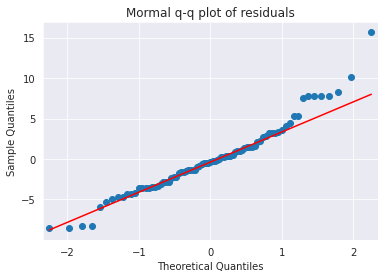

In [ ]:
import statsmodels.api as sm
model=smf.ols('MPG~VOL+SP+HP',data=cars).fit()
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Mormal q-q plot of residuals")#points that are away from line are outliers
plt.show()#here some values are more than 10y value

In [ ]:
#to print index of values whose y value is more than 10
list(np.where(model.resid>10))

[array([ 0, 76])]

# **Residual Plot for Homoscedasticity:Constant Variance**

In [ ]:
#function definition for standardization i.e z scaore , Function name:get_Standardized_values
def get_standardized_values(vals):
  return(vals-vals.mean())/vals.std()#this is z score=(xi-mean)/std dev

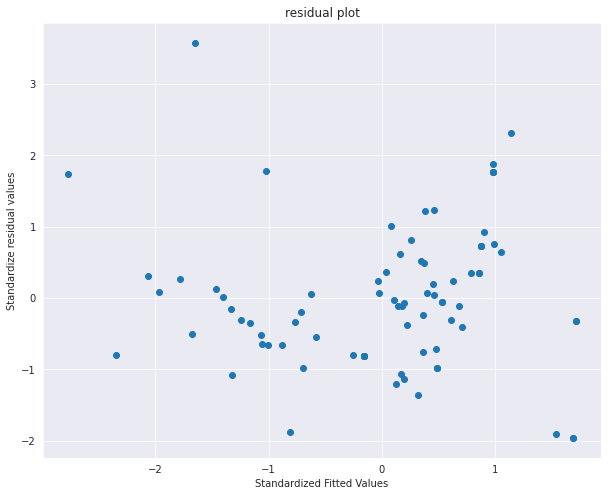

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(get_standardized_values(model.fittedvalues),#fitted value is y hat
            get_standardized_values(model.resid))#mode.residis error
plt.title('residual plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardize residual values')
plt.show()

# **Residual vs Regressor**

eval_env: 1


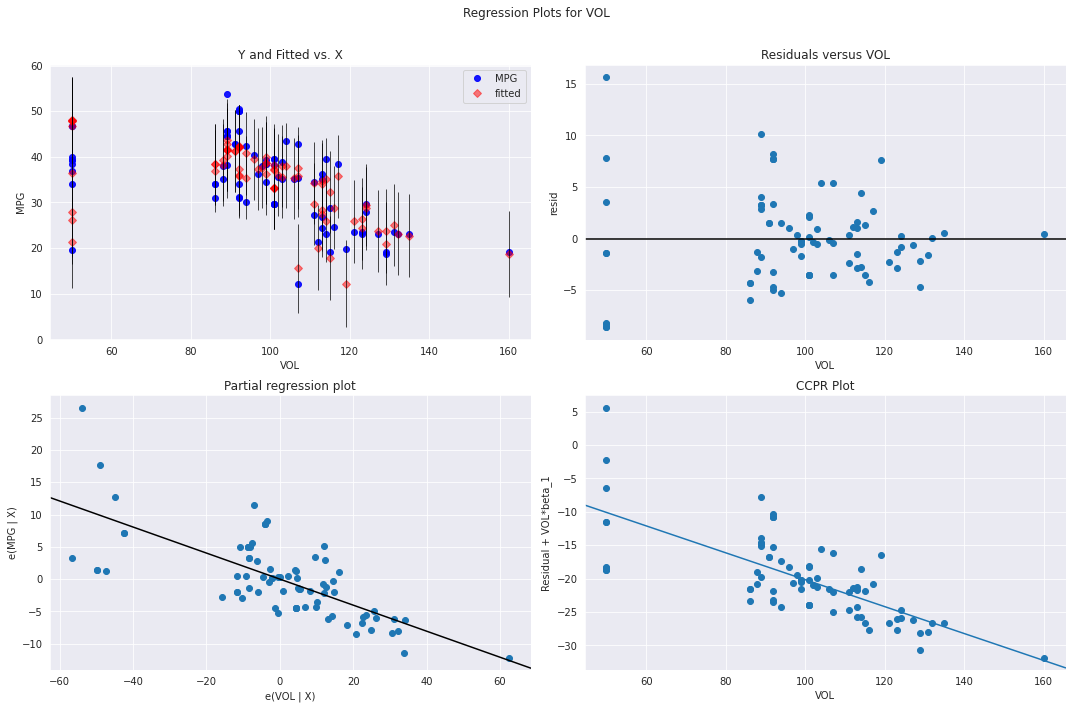

In [ ]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model, "VOL",fig=fig)
plt.show()

eval_env: 1


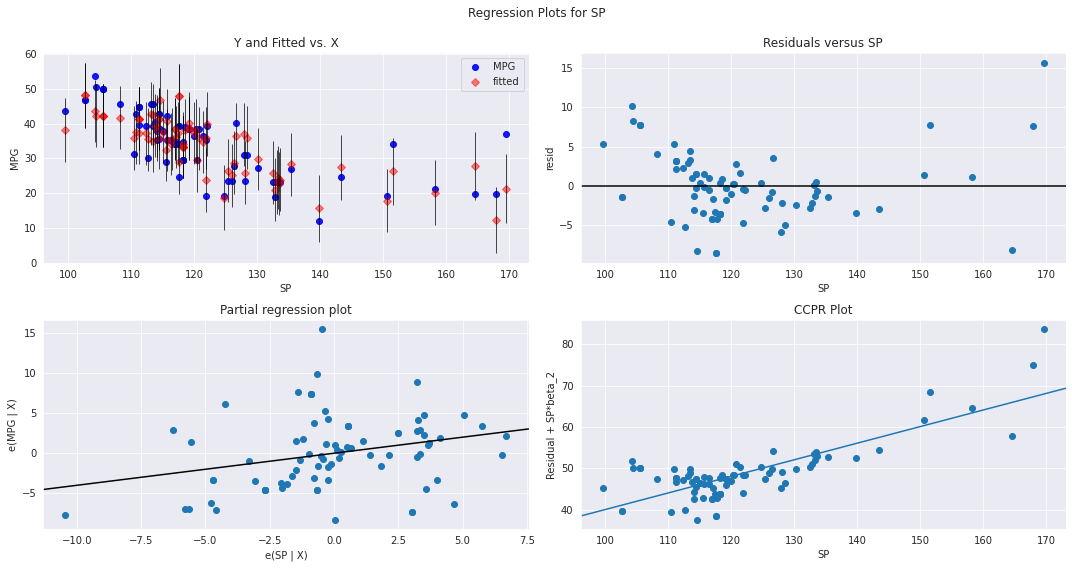

In [ ]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"SP",fig=fig)
plt.show()

eval_env: 1


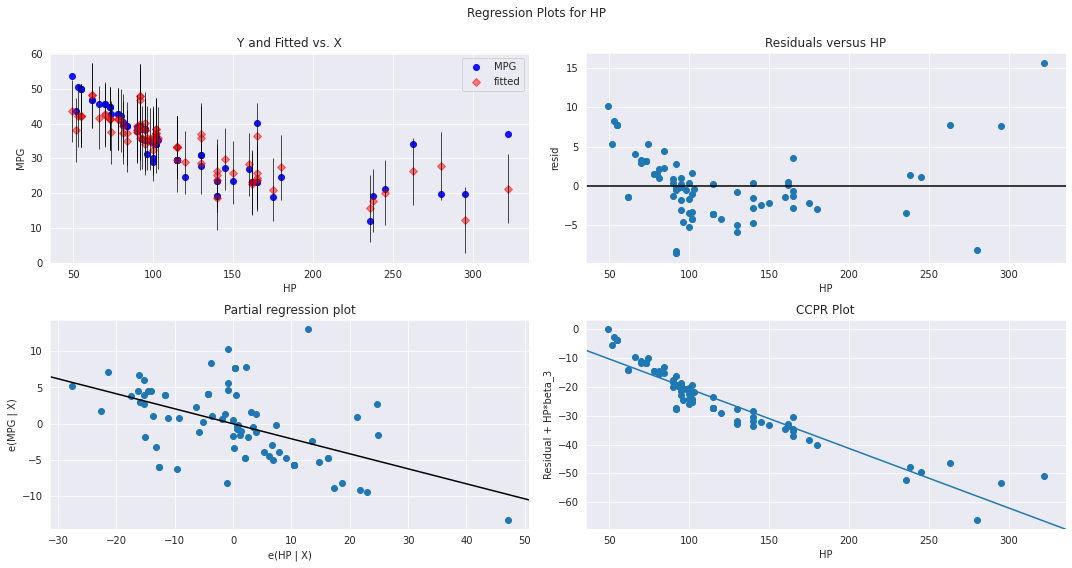

In [ ]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"HP",fig=fig)
plt.show()

# **Model deletion Diagnosis**

# Detecting Influencers/Outliers

# **Cook's Distance**

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
model_influence = model.get_influence()#this method will retuen 2 values cooks value n p value
(c,_)=model_influence.cooks_distance# we dont need p value so we gave _ sign

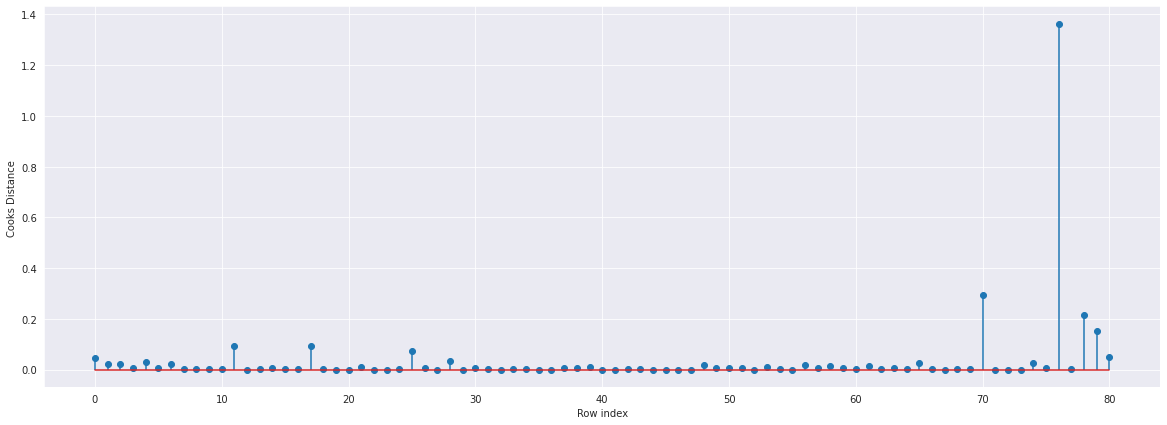

In [ ]:
#plot the influencers values using stem plot
fig=plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars)), np.round(c, 3))# index value of car on x axis
plt.xlabel('Row index')
plt.ylabel('Cooks Distance ')
plt.show()

In [ ]:
#index  and value of inflencer where c is more than
#The Cook's distance is considered high if it is greater than 0.5 and extreme if it is
(np.argmax(c),np.max(c))#argmax() gives index value of max value in dataset
 # 1.364174386910332 is cook's distance for index 76

(76, 1.364174386910332)

# **High Inflenced points**

In [ ]:
cars.shape

(81, 5)

In [ ]:
k = cars.shape[1]# k is no of varaiables
n= cars.shape[0] #no of data points
leverage_cuttoff=3*((k+1)/n)
leverage_cuttoff

0.2222222222222222

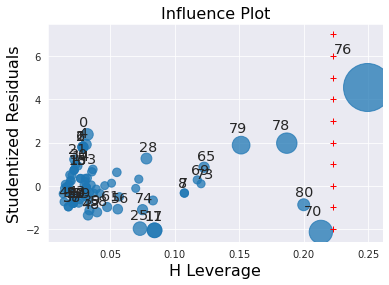

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model,alpha=0.5)

y=[i for i in range(-2,8)]# -2 to 8 :10 values for printing + in red colours
x=[leverage_cuttoff for i in range(10)]#10 values for printing + in red
plt.plot(x,y,'r+')
plt.show()

from the above plot it is evident that data point 70 and 76 are the influencers

In [ ]:
cars[cars.index.isin([70,76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [ ]:
# see the difference between in hp and other variable values
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


# **Improving the model**

In [ ]:
#load the data
cars_new=pd.read_csv('/content/Cars.csv')

In [ ]:
#discard the record no 70 n 76 which influence and reassign the row no (reset index also)
car1=cars_new.drop(cars_new.index[[70,76]],axis=0).reset_index()

In [ ]:
car1

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
74,75,175,18.762837,129,132.864163,42.778219
75,77,238,19.197888,115,150.576579,37.923113
76,78,263,34.000000,50,151.598513,15.769625
77,79,295,19.833733,119,167.944460,39.423099


In [ ]:
#drop the original index column
car1=car1.drop(['index'],axis=1)

In [ ]:
car1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


# **Build model**

In [ ]:
#exclude variable "wt which had low r^2 n high aic " and generate  r square n aic values
final_ml_v=smf.ols('MPG~VOL+SP+HP',data=car1).fit()

In [ ]:
final_ml_v.rsquared,final_ml_v.aic# comapritively lil high r ^2 n lil low aic value

(0.8161692010376008, 446.1172263944772)

In [ ]:
#exclude variable "VOL simply i too donnno" and generate  r square n aic values
final_ml_w=smf.ols('MPG~WT+SP+HP',data=car1).fit()

In [ ]:
final_ml_w.rsquared,final_ml_w.aic

(0.8160034320495303, 446.1884323575032)

comaring both of above r^2 n aic values , final_ml_v has gigh r^2 n low aic hence v include VOL so that collinearity problem will be resolved  and discard WT

In [ ]:
model_influence_V=final_ml_v.get_influence()
(c_V, _)=model_influence_V.cooks_distance
# we r applying cook distance again to find out if theres any point which crosses threshold value 1


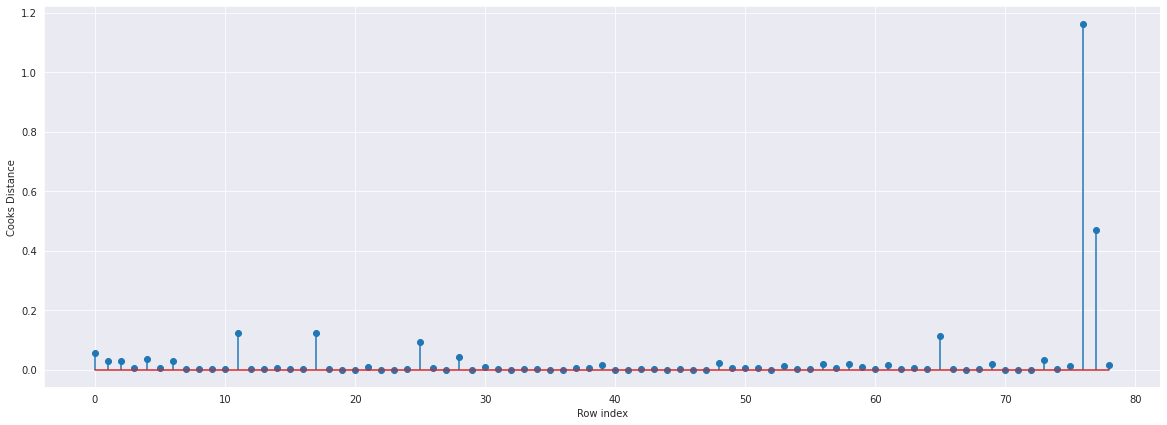

In [ ]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [ ]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(76, 1.1629387469135182)

In [ ]:
car2=car1.drop(car1.index[[76,77]],axis=0)

In [ ]:
car2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [ ]:
#reset index and rearrange the row values
car3=car2.reset_index()

In [ ]:
car4=car3.drop(['index'],axis=1)

In [ ]:
car4

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [ ]:
#build the model on new data
final_ml_v= smf.ols('MPG~VOL+SP+HP',data=car4).fit()

In [ ]:
#again check for influencers
model_influence_V=final_ml_v.get_influence()
(c_V, _)=model_influence_V.cooks_distance

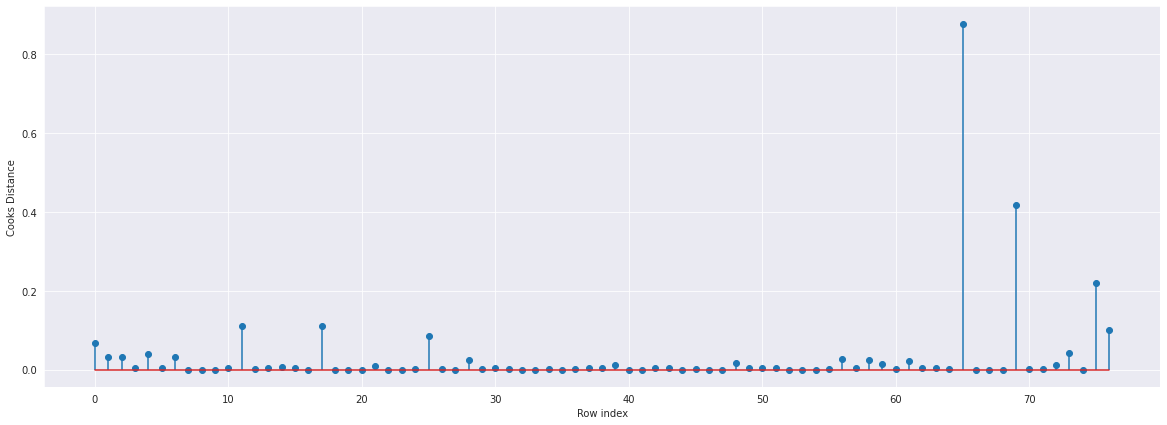

In [ ]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');
#cooks distance here is 0.9 ,which dint cross 1 so no need to remove it
#hence v consider it as out final model


In [ ]:
#index of data points where c is more tahn .5
(np.argmax(c_V),np.max(c_V))

(65, 0.8774556986296674)

SInce the value is<1 we can stop the diagnostic process and finalize the model

In [ ]:
#check the accuracy of the model
final_ml_v=smf.ols('MPG~VOL+SP+HP',data=car4).fit()

In [ ]:
(final_ml_v.rsquared,final_ml_v.aic)# compare with 1st model values .it was 0.77053  now its is

(0.8669636111859063, 409.4153062719508)

# **Predicting for the new data**

In [ ]:
#new data for prediction -what will be MPG FOR FOLLOW .VALUES?
new_data=pd.DataFrame({'HP':40,"VOL":95,"SP":102,"WT":35},index=["index 1"])

In [ ]:
new_data

,HP,VOL,SP,WT
index 1,40,95,102,35


In [ ]:
final_ml_v.predict(new_data)

index 1    46.035594
dtype: float64